In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('HRDataset.csv')
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Admin Offices,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0
3,"Howard, Estelle",1.211051e+09,1.0,1.0,0.0,1.0,1.0,3.0,0.0,21.50,...,Admin Offices,Brandon R. LeBlanc,1.0,Pay Per Click - Google,Fully Meets,3.24,3.0,4.0,NaN,NaN
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Admin Offices,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0


In [71]:
df.drop(['LastPerformanceReview_Date','DaysLateLast30'],axis=1,inplace=True)
df.dropna(thresh=2,inplace=True)

<Axes: >

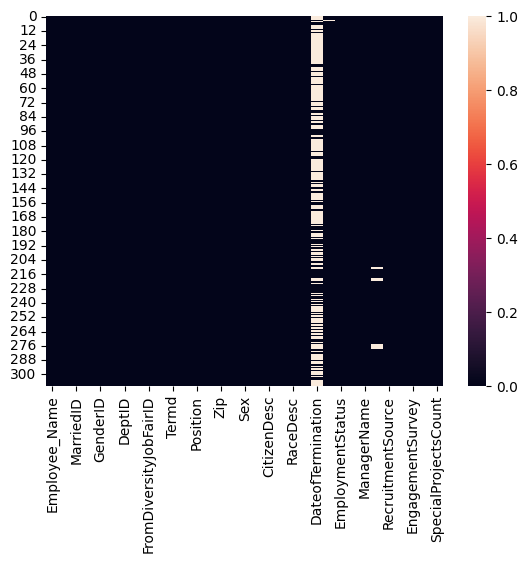

In [72]:
sns.heatmap(df.isnull())

In [140]:
#Zadanie 1

In [74]:
df['ManagerID'].value_counts()

ManagerID
20.0    22
18.0    22
16.0    22
11.0    21
19.0    21
22.0    21
12.0    21
14.0    21
2.0     19
4.0     17
7.0     14
17.0    14
39.0    13
21.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
30.0     1
3.0      1
Name: count, dtype: int64

In [142]:
#Pozbywamy się do analizy menadżerów, który zarządzali 3 lub mniej pracownikami
managers_to_drop = df['ManagerID'].value_counts()[df['ManagerID'].value_counts() <= 3].index
managers_to_drop

Index([15.0, 9.0, 30.0, 3.0], dtype='float64', name='ManagerID')

In [144]:
#Udziałowy procent ocen wg menadżera
man_and_perf = df.groupby('ManagerID')['PerfScoreID'].value_counts(normalize=True).rename('Percentage').reset_index()
man_and_perf = man_and_perf.drop(man_and_perf[man_and_perf['ManagerID'].isin(managers_to_drop)].index)
man_and_perf.head()

,ManagerID,PerfScoreID,Percentage
0,1.0,3.0,1.000000
1,2.0,3.0,0.684211
2,2.0,4.0,0.210526
3,2.0,2.0,0.105263
5,4.0,3.0,0.882353


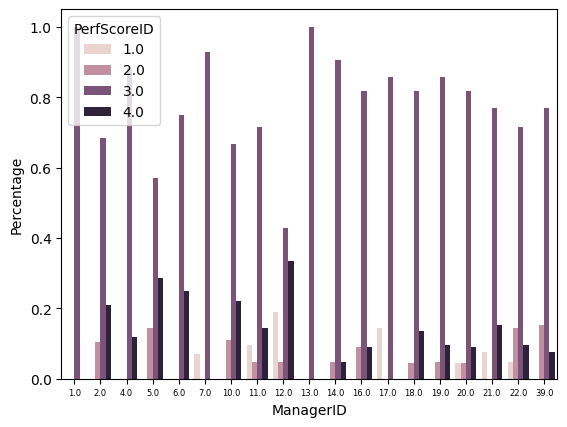

In [136]:
sns.barplot(x='ManagerID', y='Percentage', hue='PerfScoreID', data=man_and_perf)
plt.xticks(fontsize=6)
plt.show()

In [146]:
#Średnia ocena, którą wystawił każdy menadżer
man_and_perf.pivot_table(index='ManagerID', values='PerfScoreID', aggfunc='mean')

,PerfScoreID
ManagerID,
1.0,3.000000
2.0,3.000000
4.0,3.500000
5.0,3.000000
6.0,3.500000
7.0,2.000000
10.0,3.000000
11.0,2.500000
12.0,2.500000


In [78]:
df['ManagerID'].corr(df['PerfScoreID'])

np.float64(-0.06530609488589603)

In [147]:
#Pokazaliśmy procentowy udział ocen wg menadżera
#Według analizy menadżer nr 12 miał najbardziej rozbierzne opinie - wiele pracowników dostało 1, wiele natomiast 4
#Dla zdecydowanej większości menadżerów najwięcej udziału ma ocena 3
#Menadżerowie nr 7, 17 mogą być uznani za najbardziej surowych, jakoże nie dali oceny 4, lecz dali kilka 1
#Pearson's correlation coefficient jest ponadto bliski zeru, co znaczy, że nie ma dowodów na liniową korelację między poziomem satysfkacji a menadżerem

In [83]:
#Zadanie 2
import datetime as dt

def count_seniority(row):

    if pd.isnull(row['DateofTermination']):
        end_date = dt.datetime(2019,9,27)
    else:
        end_date = row['DateofTermination']

    return (end_date - row['DateofHire']).days / 365.25

In [92]:
df['DOB'] = pd.to_datetime(df['DOB'],format='%m/%d/%y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'],format='%m/%d/%y')
df['DateofHire'] = pd.to_datetime(df['DateofHire'],format='%m/%d/%Y')
#Lata '65' itd. były rozumiane jako 1965, więc musiałam użyć:
df['DOB'] = df['DOB'].apply(lambda x: x if x.year <= dt.datetime.now().year else x.replace(year=x.year - 100))
df[['DateofTermination','DOB','DateofHire']].head(10)

,DateofTermination,DOB,DateofHire
0,NaT,1987-11-24,2008-10-27
1,NaT,1984-04-26,2014-01-06
2,NaT,1986-09-01,2014-09-29
3,2015-04-15,1985-09-16,2015-02-16
4,NaT,1988-05-19,2015-05-01
5,2013-09-25,1987-06-14,2011-09-26
6,2014-08-02,1964-06-01,2011-08-15
7,NaT,1963-05-15,2014-08-18
8,NaT,1987-05-14,2012-02-20
9,NaT,1988-09-14,2014-08-18


In [28]:
df['Seniority'] = df.apply(lambda row: count_seniority(row),axis=1)
df[['DateofHire','DateofTermination','Seniority']].head()

,DateofHire,DateofTermination,Seniority
0,2008-10-27,NaT,10.915811
1,2014-01-06,NaT,5.722108
2,2014-09-29,NaT,4.993840
3,2015-02-16,2015-04-15,0.158795
4,2015-05-01,NaT,4.407940


In [31]:
df['RecruitmentSource'].value_counts()

RecruitmentSource
Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
MBTA ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Website Banner Ads                        13
Word of Mouth                             13
On-campus Recruiting                      12
Social Networks - Facebook Twitter etc    11
Other                                      9
Indeed                                     8
Internet Search                            6
Information Session                        4
Pay Per Click                              1
On-line Web application                    1
Careerbuilder                        

In [33]:
#By uporządkować dane, kategorie, które mają mniej niż 6 pracowników zostaną przerzucone do kategorii "Other"
df['RecruitmentSource'].replace(['Information Session','Pay Per Click','On-line Web application','Careerbuilder','Company Intranet - Partner'], 'Other')
df['RecruitmentSource'].value_counts()

RecruitmentSource
Employee Referral                         31
Diversity Job Fair                        29
Search Engine - Google Bing Yahoo         25
Monster.com                               24
Pay Per Click - Google                    21
Professional Society                      20
Newspager/Magazine                        18
Other                                     17
MBTA ads                                  17
Billboard                                 16
Vendor Referral                           15
Glassdoor                                 14
Website Banner Ads                        13
Word of Mouth                             13
On-campus Recruiting                      12
Social Networks - Facebook Twitter etc    11
Indeed                                     8
Internet Search                            6
Name: count, dtype: int64

<Axes: xlabel='Seniority', ylabel='RecruitmentSource'>

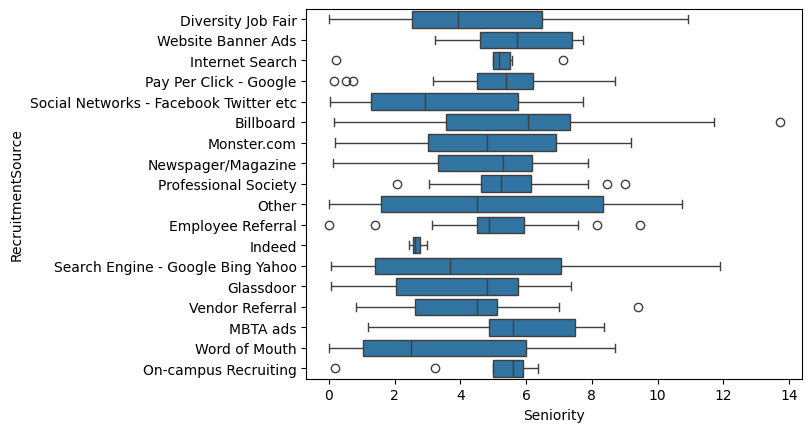

In [34]:
sns.boxplot(x='Seniority', y='RecruitmentSource', data=df)

In [37]:
#W tym wypadku lepiej spojrzeć na medianę niż na średnią, gdyż mediana ignoruje outliery.
#Jeśli zależy nam na jak najdłuższym stażu pracowników, najlepszym źródłem rekrutacji jest "Billboard".
#Źródło rekrutacji nie ma jednak aż tak wielkiego znaczenia, jakoże mediany wahają się dla większości kategorii w okolicach 5-6 lat.
#Wyjątkami są "Diversity Job Fair", "Social Networks", "Indeed" i "Word of Mouth", które wiążą się z krótszym stażem.

In [151]:
#Zadanie 3

In [46]:
df['MaritalDesc'].value_counts()

MaritalDesc
Single       137
Married      123
Divorced      30
Separated     12
Widowed        8
Name: count, dtype: int64

In [152]:
#Osób owdowiałych jest zdecydowanie najmniej. Warto by się zastanowić
#czy taka liczba obserwacji nie jest za mała, by nie wprowadzić błędów do analizy.

In [155]:
mar_and_emp = df.groupby('MaritalDesc')['EmpSatisfaction'].value_counts(normalize=True).rename('Percentage').reset_index()
mar_and_emp.head()

,MaritalDesc,EmpSatisfaction,Percentage
0,Divorced,4.0,0.466667
1,Divorced,5.0,0.300000
2,Divorced,3.0,0.200000
3,Divorced,2.0,0.033333
4,Married,3.0,0.439024


In [157]:
#Średni poziom szczęścia wg statusu
mar_and_emp.pivot_table(index='MaritalDesc', values='EmpSatisfaction', aggfunc='mean')

,EmpSatisfaction
MaritalDesc,
Divorced,3.50
Married,3.50
Separated,3.25
Single,3.00
Widowed,4.50


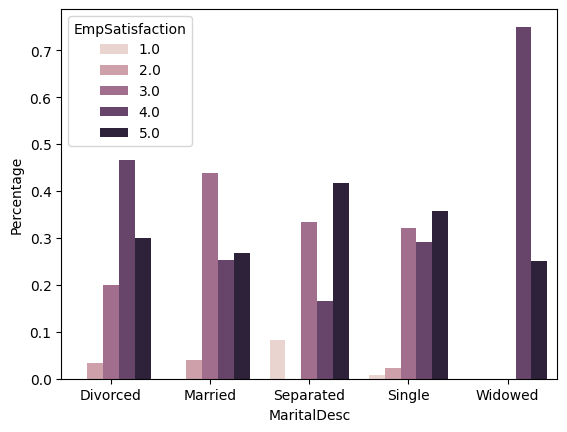

In [150]:
sns.barplot(x='MaritalDesc', y='Percentage', hue='EmpSatisfaction', data=mar_and_emp)
plt.show()

In [ ]:
#Według średniej, osoby owdowiałe są zazwyczaj średnio najszczęśliwsze, a single najmniej szczęśliwi
#Osoby odseparowane zawierają zarazem największy procent procentowy osób najmniej i najbardziej szczęśliwych
#Między najbardziej licznymi grupami, osobami zamężnymi/żonatymi i singlami, single wydają się bardziej szczęśliwi,
#jako że mają większy udział ocen 4 i 5, mimo że wg średniej są oni mniej szczęśliwi

In [91]:
#Zadanie 4
reference_date = dt.datetime(2019, 9, 27)
df['Age'] = (reference_date - df['DOB']).dt.days / 365.25
df[['DOB','Age']].head()

,DOB,Age
0,1987-11-24,31.841205
1,1984-04-26,35.419576
2,1986-09-01,33.070500
3,1985-09-16,34.028747
4,1988-05-19,31.356605


In [86]:
curr_employed=df[df['EmploymentStatus']=='Active']
curr_employed.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,PayRate,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Age
0,"Brown, Mia",1.103024e+09,1.0,1.0,0.0,1.0,1.0,3.0,1.0,28.50,...,Brandon R. LeBlanc,1.0,Diversity Job Fair,Fully Meets,2.04,2.0,6.0,1/15/2019,0.0,31.841205
1,"LaRotonda, William",1.106027e+09,0.0,2.0,1.0,1.0,1.0,3.0,0.0,23.00,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,4.0,4.0,1/17/2019,0.0,35.419576
2,"Steans, Tyrone",1.302053e+09,0.0,0.0,1.0,1.0,1.0,3.0,0.0,29.00,...,Brandon R. LeBlanc,1.0,Internet Search,Fully Meets,3.90,5.0,5.0,1/18/2019,0.0,33.070500
4,"Singh, Nan",1.307060e+09,0.0,0.0,0.0,1.0,1.0,3.0,0.0,16.56,...,Brandon R. LeBlanc,1.0,Website Banner Ads,Fully Meets,5.00,3.0,5.0,1/15/2019,0.0,31.356605
7,"Carter, Michelle",1.403066e+09,0.0,0.0,0.0,1.0,6.0,3.0,0.0,55.00,...,John Smith,17.0,Billboard,Fully Meets,5.00,5.0,0.0,1/21/2019,0.0,56.369610


<Axes: xlabel='Age', ylabel='Count'>

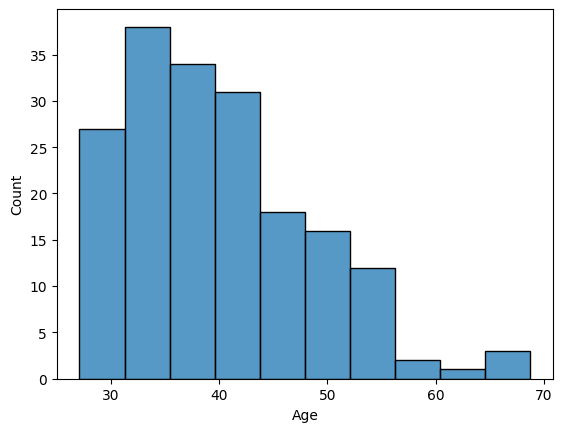

In [88]:
sns.histplot(curr_employed['Age'])

<Axes: xlabel='Age'>

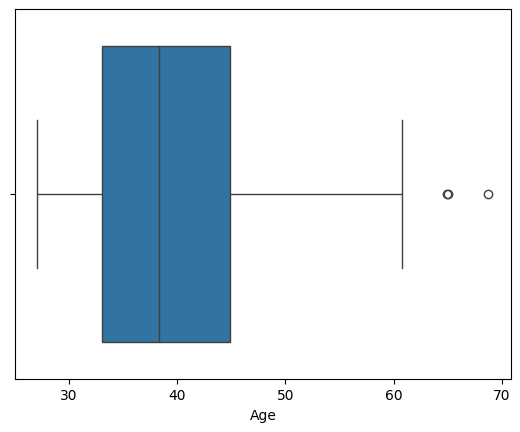

In [93]:
sns.boxplot(x='Age', data=curr_employed)

In [89]:
curr_employed['Age'].max()

np.float64(68.7337440109514)

In [90]:
curr_employed['Age'].min()

np.float64(27.110198494182068)

In [94]:
curr_employed['Age'].median()

np.float64(38.33401779603012)

In [96]:
curr_employed['Age'].mean()

np.float64(39.9330730870772)

In [97]:
#Najmłodsza osoba ma 27 lat, a najstarsza prawie 69.
#Histogram jest skewed to the left, co znaczy że znacząca większość pracowników jest w dolnej połowie (osoby młodsze), z medianą 38 lat.
#Kilka najstarszych osób zostało uznanych za outliery.
#Średnia i mediana są sobie bliskie, co znaczy, że outliery nie wprowadzają znacznych błędów (choć zawyżają średnią, to nie aż tak znacząco).

In [163]:
#Zadanie 5

In [112]:
df['SpecialProjectsCount'].value_counts()

SpecialProjectsCount
0.0    242
6.0     21
5.0     21
7.0     12
4.0      9
3.0      2
8.0      2
2.0      1
Name: count, dtype: int64

In [165]:
#Pozbędziemy się do analizy ilości projektów, które miało 5 lub mniej osób
projects_to_drop = df['SpecialProjectsCount'].value_counts()[df['SpecialProjectsCount'].value_counts() <= 5].index
projects_to_drop

Index([3.0, 8.0, 2.0], dtype='float64', name='SpecialProjectsCount')

In [208]:
#Zaokrąglamy wiek do 5 lat
df['Age_Approx_5'] = (df['Age']/5).round()*5
df[['Age','Age_Approx_5']].head()

,Age,Age_Approx_5
0,31.841205,30.0
1,35.419576,35.0
2,33.070500,35.0
3,34.028747,35.0
4,31.356605,30.0


In [217]:
age_and_pro = df.groupby('SpecialProjectsCount')['Age_Approx_5'].value_counts(normalize=True).rename('Percentage').reset_index()
age_and_pro = age_and_pro.drop(age_and_pro[age_and_pro['SpecialProjectsCount'].isin(projects_to_drop)].index)
age_and_pro.head()

,SpecialProjectsCount,Age_Approx_5,Percentage
0,0.0,35.0,0.256198
1,0.0,40.0,0.194215
2,0.0,45.0,0.169421
3,0.0,30.0,0.152893
4,0.0,50.0,0.103306


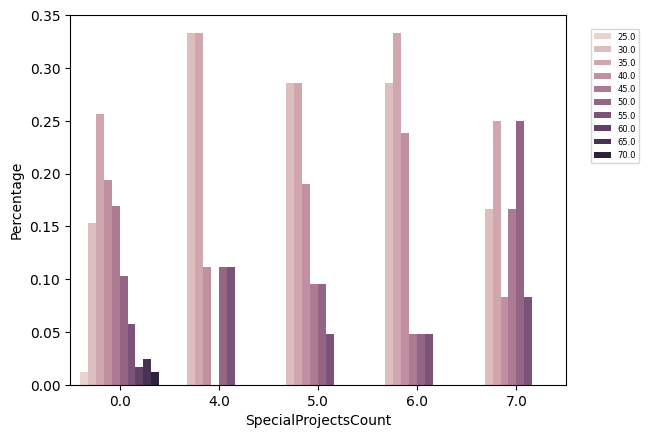

In [228]:
sns.barplot(x='SpecialProjectsCount', y='Percentage', hue='Age_Approx_5', data=age_and_pro,legend="full")
plt.legend(fontsize=6,loc=(1.05,0.60))
plt.show()

In [229]:
age_and_pro['SpecialProjectsCount'].corr(df['Age_Approx_5'])

np.float64(0.11099907229583036)

In [230]:
#Na podstawie grafu i Pearson correlation coefficient
#można stwierdzić, że jest lekka liniowa zależność między liczbą projektów a wiekiem.
#Osoby starsze zdając się mieć udział w większej ilości specjalnych projektów.
#Wyjątkiem są osoby w dwóch najstarszych grupach, które nie mają żadnych specjalnych projektów.
#Zobaczmy się, jak zmieni się zależność, gdy wyeliminujemy te dwie grupy.

In [231]:
age_and_pro = age_and_pro.drop(age_and_pro[age_and_pro['Age_Approx_5']>55].index)

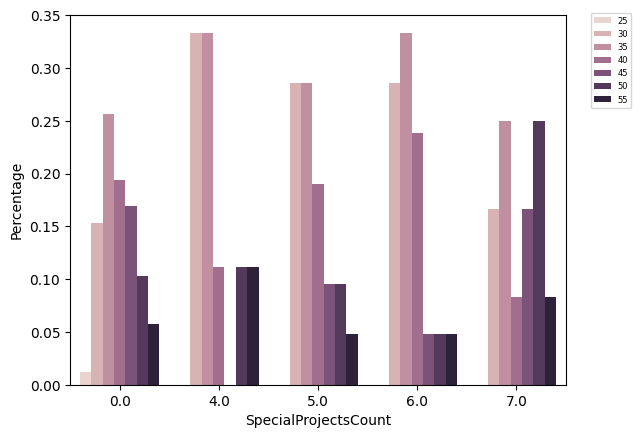

In [234]:
sns.barplot(x='SpecialProjectsCount', y='Percentage', hue='Age_Approx_5', data=age_and_pro)
plt.legend(fontsize=6,loc=(1.05,0.75))
plt.show()

In [215]:
age_and_pro['SpecialProjectsCount'].corr(df['Age_Approx_5'])

np.float64(0.3238068714461773)

In [218]:
#Z tej wartości Pearson correlation coefficient wynika, że jest umiarkowana liniowa zależność
#między ilością specjalnych projektów a wiekiem, gdy wyeliminujemy kilka najstarszych grup (które nie są zresztą liczne).

In [219]:
df.to_csv('hrdataset_analysis.csv')